In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
import seaborn as sns

import matplotlib.ticker as ticker


## Fibonaccijeva števila

## Analiza paralelnega izračuna Fibonaccijevih števil v odvisnosti od števila domen

In [2]:
df_fib_domains = pd.read_csv('fib_par_domains.csv')

/var/folders/9s/v0gzy6497956yzhn8x7gf8mh0000gn/T/ipykernel_61545/2813857426.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='grey')


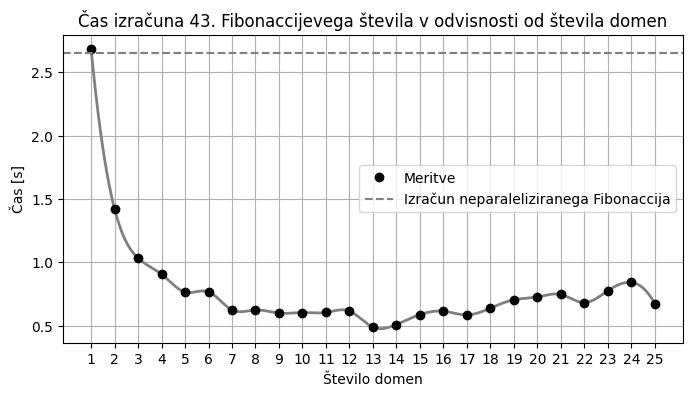

In [3]:
izracun_neparaleliziranega_fibonaccija = 2.65

# Create a new figure
plt.figure(figsize=(8, 4))

# Making the line plot smoother using scipy
xnew = np.linspace(df_fib_domains['num_domains'].min(), df_fib_domains['num_domains'].max(), 500) 
spl = make_interp_spline(df_fib_domains['num_domains'], df_fib_domains['time'], k=3)
power_smooth = spl(xnew)

# Plot the smooth line
plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='grey')

# Plot the data points
plt.plot(df_fib_domains['num_domains'], df_fib_domains['time'], 'ko', label='Meritve')

# Add a straight horizontal line at y=2.9
plt.axhline(y=izracun_neparaleliziranega_fibonaccija, color='grey', linestyle='--', label='Izračun neparaleliziranega Fibonaccija')

# Add title and labels
plt.title('Čas izračuna 43. Fibonaccijevega števila v odvisnosti od števila domen')
plt.xlabel('Število domen')
plt.ylabel('Čas [s]')

# Adjust x-axis to show discrete values
plt.xticks(range(1, 26))

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

plt.savefig('fib_par_v_odvisnosti_od_domen.jpg')

# Display the plot
plt.show()



## Analiza časa izračuna n-tega Fibonaccijevega števila pri fiksnem številu domen

### sequential_threshold = 38

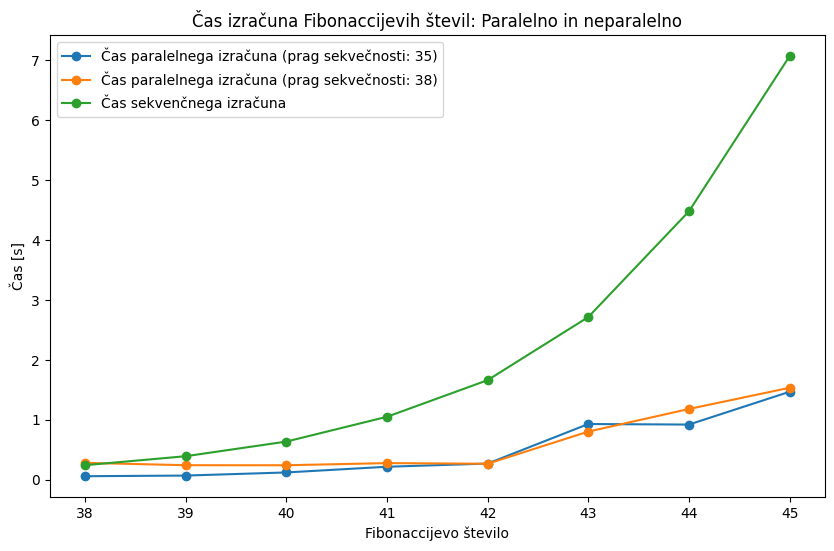

In [3]:
# Read the CSV file into a pandas df_bfs_combinationsFrame
data = pd.read_csv('fib_par_n.csv')

# Izlušči stolpce z podatki
fib_number = data['fib_number']
parallel_time_lower_threshold = data['parallel_time_lower_threshold']
parallel_time_upper_threshold = data['parallel_time_upper_threshold']
non_parallel_time = data['non_parallel_time']

# Prilagodi graf
plt.figure(figsize=(10, 6))
plt.plot(fib_number, parallel_time_lower_threshold, marker='o', label='Čas paralelnega izračuna (prag sekvečnosti: 35)')
plt.plot(fib_number, parallel_time_upper_threshold, marker='o', label='Čas paralelnega izračuna (prag sekvečnosti: 38)')
plt.plot(fib_number, non_parallel_time, marker='o', label='Čas sekvenčnega izračuna')
plt.xlabel('Fibonaccijevo število')
plt.ylabel('Čas [s]')
plt.title('Čas izračuna Fibonaccijevih števil: Paralelno in neparalelno')
plt.legend()

plt.savefig('fib_par_v_odvisnosti_od_n.jpg')

# Prikaz grafa
plt.show()



## BFS

### Analiza časa izvajanja BFS algoritma v odvisnosti od velikosti grafa

In [4]:
df_bfs_combinations = pd.read_csv('bfs_par_combinations.csv')

In [5]:
df_bfs_combinations.head()

,num_nodes,num_edges,parallel_time,sequential_time
0,500,12475,0.003,0.002
1,1000,49950,0.010,0.008
2,1500,112425,0.023,0.021
3,2000,199900,0.038,0.038
4,2500,312375,0.065,0.059


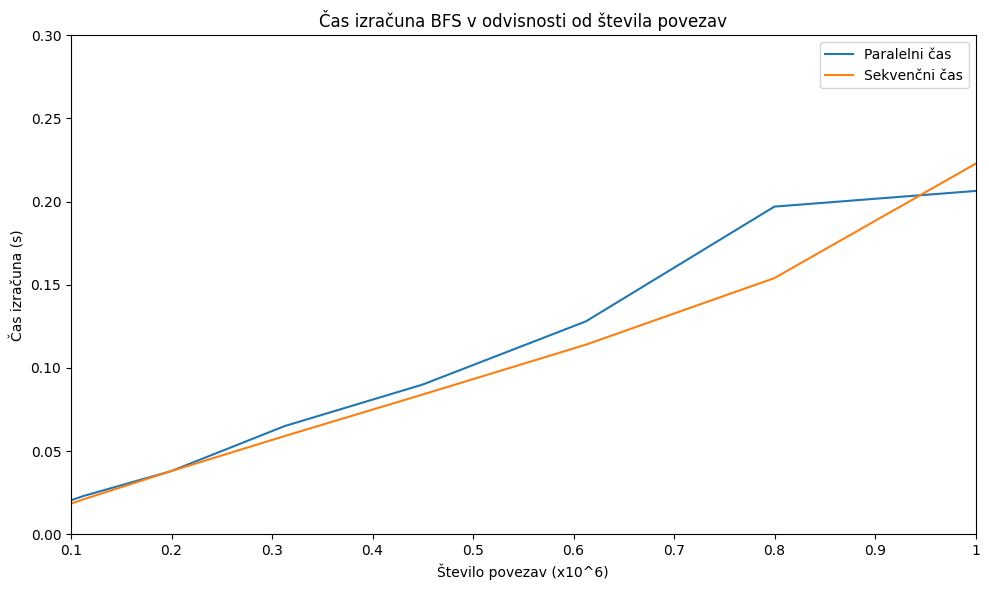

In [8]:
plt.figure(figsize=(10, 6))

# Plot the computation time as a function of num_edges
plt.plot(df_bfs_combinations['num_edges'], df_bfs_combinations['parallel_time'], label='Paralelni čas')
plt.plot(df_bfs_combinations['num_edges'], df_bfs_combinations['sequential_time'], label='Sekvenčni čas')
plt.xlabel('Število povezav (x10^6)')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna BFS v odvisnosti od števila povezav')

# Format x-axis
scale_x = 1e6
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
plt.gca().xaxis.set_major_formatter(ticks_x)

# Set x-axis limits and ticks
plt.xlim(100000, 1000000)
plt.xticks(range(100000, 1000001, 100000))

plt.ylim(0, 0.3)


plt.legend()

# Display the plot with a bit of padding
plt.tight_layout()

plt.savefig('bfs_v_odvisnosti_od_velikosti_grafa.jpg')


plt.show()


### Analiza časa izvajanja algoritma BFS v odvisnosti od števila domen

In [24]:
df_bfs_par_domains = pd.read_csv('bfs_par_domains.csv')
df_bfs_par_domains

,num_domains,time
0,1,0.271
1,2,0.232
2,3,0.227
3,4,0.258
4,5,0.238
5,6,0.235
6,7,0.237
7,8,0.238


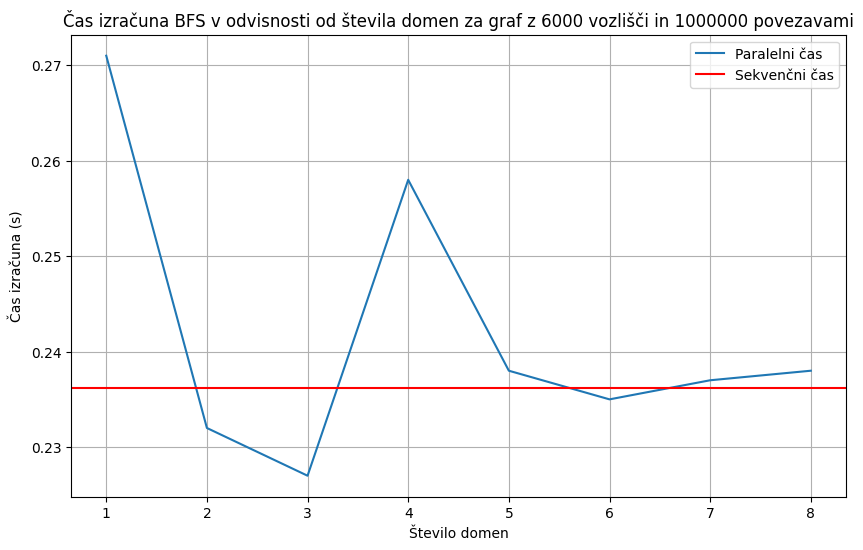

In [25]:
plt.figure(figsize=(10, 6))

seq_computation_time = 0.236200

# Plotting the computation time as a function of num_domains
plt.plot(df_bfs_par_domains['num_domains'], df_bfs_par_domains['time'], label='Paralelni čas')

# Adding a horizontal line for the sequential execution time
plt.axhline(y=seq_computation_time, color='r', linestyle='-', label='Sekvenčni čas')

plt.xlabel('Število domen')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna BFS v odvisnosti od števila domen za graf z 6000 vozlišči in 1000000 povezavami')

plt.legend()
plt.grid(True)

plt.savefig('bfs_v_odvisnosti_od_stevila_domen.jpg')

plt.show()


## Dijkstra

### Analiza časa izvajanja Dijkstra algoritma v odvisnosti od velikosti grafa

In [2]:
df_dijkstra_combinations = pd.read_csv('dijkstra_par_combinations.csv')

In [3]:
df_dijkstra_combinations.head()

,num_nodes,num_edges,par_time,seq_time
0,1000,149850,2.674,7.922
1,950,135232,1.667,4.928
2,900,121365,1.234,3.783
3,850,108247,1.054,3.106
4,800,95880,0.932,2.511


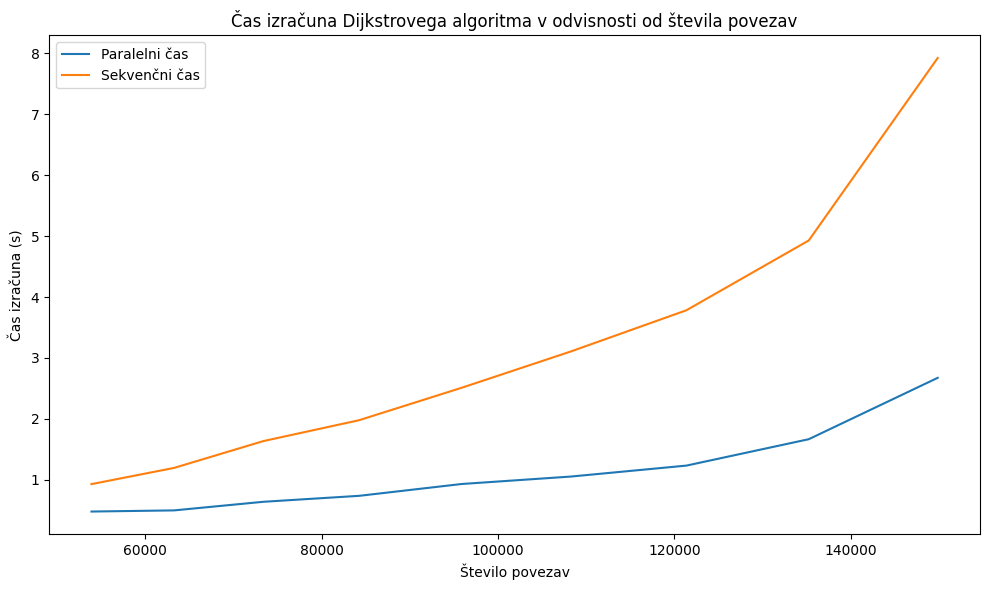

In [4]:
plt.figure(figsize=(10, 6))

# Plot the computation time as a function of num_edges
plt.plot(df_dijkstra_combinations['num_edges'], df_dijkstra_combinations['par_time'], label='Paralelni čas')
plt.plot(df_dijkstra_combinations['num_edges'], df_dijkstra_combinations['seq_time'], label='Sekvenčni čas')
plt.xlabel('Število povezav')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna Dijkstrovega algoritma v odvisnosti od števila povezav')

plt.legend()

plt.tight_layout()

plt.savefig('dijkstra_v_odvisnosti_od_velikosti_grafa.jpg')

plt.show()


### Analiza časa izvajanja algoritma BFS v odvisnosti od števila domen

In [7]:
df_dijkstra_par_domains = pd.read_csv('dijkstra_par_domains.csv')

In [6]:
df_dijkstra_par_domains

,num_domains,time
0,1,2.652
1,2,1.266
2,3,0.884
3,4,0.974
4,5,1.071
5,6,0.929
6,7,0.899
7,8,1.021


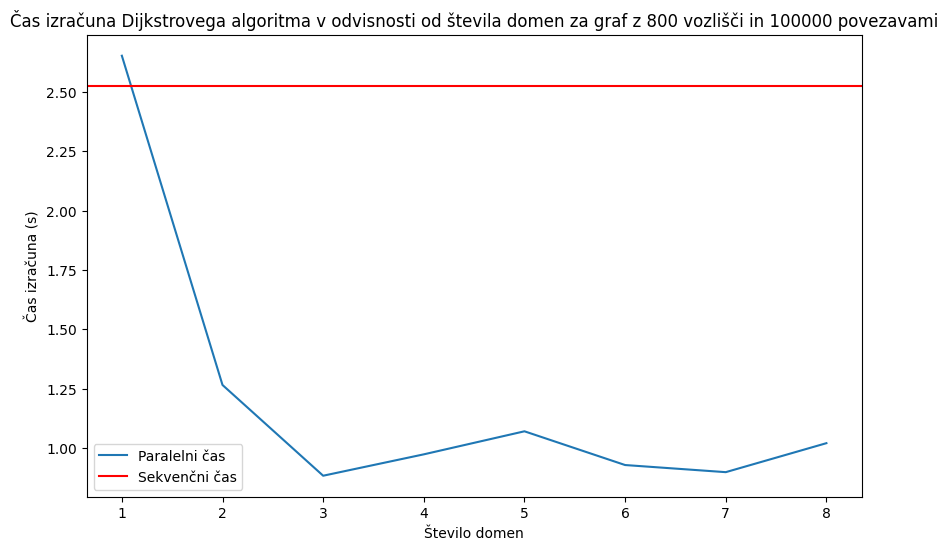

In [7]:
plt.figure(figsize=(10, 6))

seq_computation_time = 2.524623

plt.plot(df_dijkstra_par_domains['num_domains'], df_dijkstra_par_domains['time'], label='Paralelni čas')

# Adding a horizontal line for the sequential execution time
plt.axhline(y=seq_computation_time, color='r', linestyle='-', label='Sekvenčni čas')

plt.xlabel('Število domen')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna Dijkstrovega algoritma v odvisnosti od števila domen za graf z 800 vozlišči in 100000 povezavami')

plt.legend()

plt.savefig('dijkstra_v_odvisnosti_od_stevila_domen.jpg')

plt.show()

## Floyd-Warshall

### Analiza časa izvajanja Floyd-Warshallovega algoritma v odvisnosti od števila domen

In [3]:
df_floyd_par_domains = pd.read_csv('floyd_par_domains.csv')


In [4]:
df_floyd_par_domains

,num_domains,time
0,1,8.565438
1,2,4.491987
2,3,3.091885
3,4,2.315797
4,5,2.017777
5,6,1.757201
6,7,2.144455
7,8,1.980837


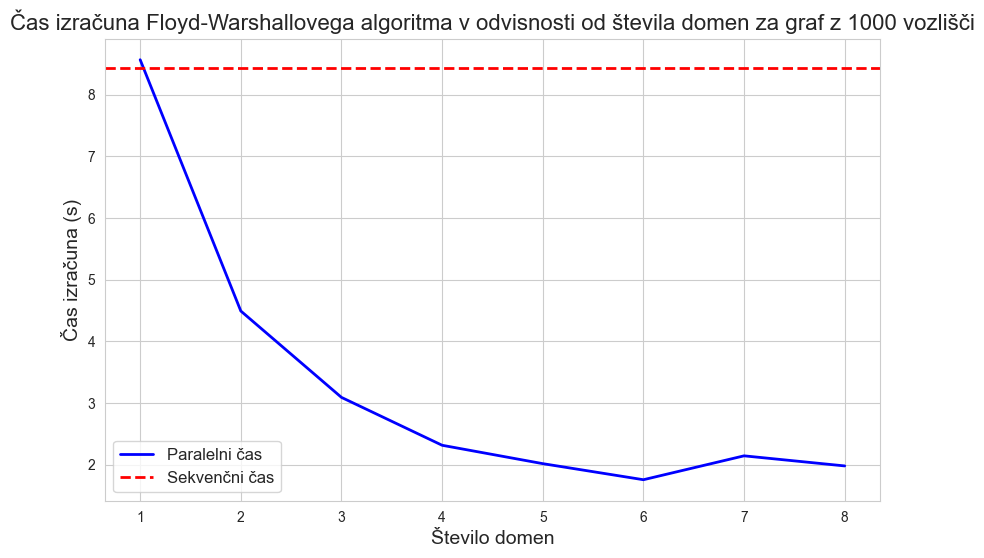

In [6]:
# Set the style of seaborn for better looking plots
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

seq_computation_time = 8.428

# Change the line style and color for better visibility
plt.plot(df_floyd_par_domains['num_domains'], df_floyd_par_domains['time'], label='Paralelni čas', color='blue', linewidth=2)

# Adding a horizontal line for the sequential execution time
plt.axhline(y=seq_computation_time, color='r', linestyle='dashed', linewidth=2, label='Sekvenčni čas')

plt.xlabel('Število domen', fontsize=14)
plt.ylabel('Čas izračuna (s)', fontsize=14)
plt.title('Čas izračuna Floyd-Warshallovega algoritma v odvisnosti od števila domen za graf z 1000 vozlišči', fontsize=16)

plt.legend(fontsize=12)

plt.savefig('floyd_v_odvisnosti_od_stevila_domen.jpg')

plt.show()

### Analiza časa izvajanja Floyd-Warshallovega algoritma v odvisnosti od velikosti grafa

In [10]:
df_floyd_combinations = pd.read_csv('floyd_par_combinations.csv')

In [11]:
df_floyd_combinations

,num_nodes,num_edges,par_time,seq_time
0,1000,149850,1.824,8.425
1,950,135232,1.602,7.154
2,900,121365,1.349,6.138
3,850,108247,1.080,5.032
4,800,95880,0.876,4.200
5,750,84262,0.708,3.459
6,700,73395,0.566,2.823
7,650,63277,0.465,2.268
8,600,53910,0.380,1.793
9,550,45292,0.289,1.387


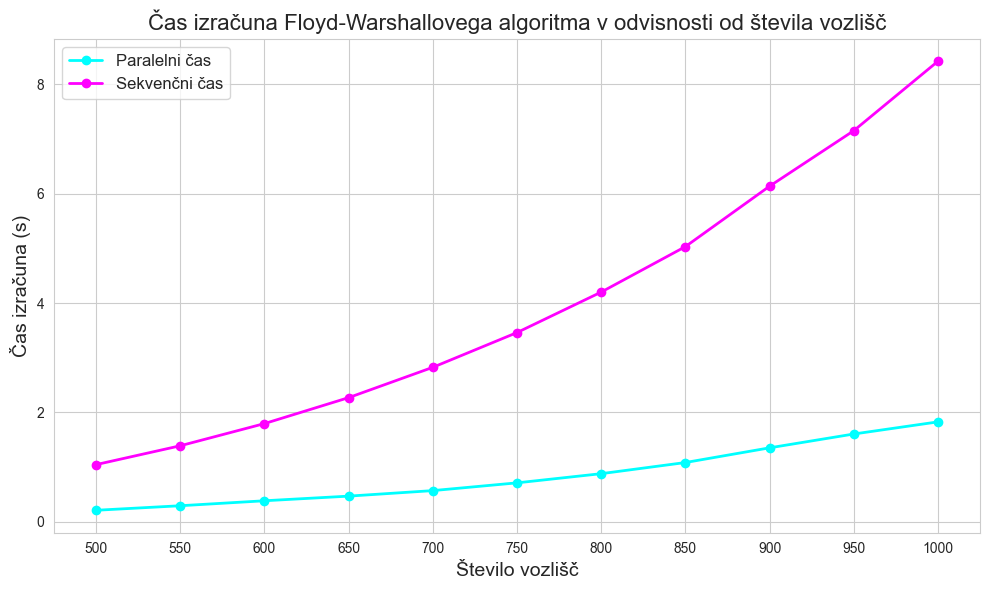

In [24]:
# Set the style to 'dark_background'
# plt.style.use('dark_background')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Change the line style and color for better visibility
plt.plot(df_floyd_combinations['num_nodes'], df_floyd_combinations['par_time'], label='Paralelni čas', color='cyan', linewidth=2, marker='o')
plt.plot(df_floyd_combinations['num_nodes'], df_floyd_combinations['seq_time'], label='Sekvenčni čas', color='magenta', linewidth=2, marker='o')

plt.xlabel('Število vozlišč', fontsize=14)
plt.ylabel('Čas izračuna (s)', fontsize=14)
plt.title('Čas izračuna Floyd-Warshallovega algoritma v odvisnosti od števila vozlišč', fontsize=16)

# Set the x-axis ticks to [500, 550, 600, 650, ..., 950, 1000]
plt.xticks(range(500, 1001, 50))

plt.legend(fontsize=12)

# plt.savefig doesn't work. I save the image manually and upload it to ./diploma/slike
plt.tight_layout()

plt.show()